# Homework 5: Modeling Bacterial Growth

### <p style="text-align: right;"> &#9989; Kaitlyn Watson


# __CMSE  201 &ndash; Spring 2022__

<img src="https://cmse.msu.edu/sites/_cmse/assets/Image/image002.jpg"
     alt="CMSE Logo"
     align="right" 
     height="100" 
     width="100" />
     
## Goals

In this homework, you will use Numpy, SciPy and Matplotlib to model the bacterial growth. This should serve as a good assessment of what you understand at this point in the course. Make sure to use Slack and help room hours if you run into issues!

### By the end of the homework assignment you will have practiced:

1. Using `solve_ivp`
2. Using `matplotlib`
3. Building compartmental models
4. Interpreting model results

## Assignment instructions

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

**This assignment is due at 11:59pm on Friday, Apr 1st.** It should be uploaded into the "Homework Assignments" dropbox folder for Homework #5.  Submission instructions can be found at the end of the notebook.

## Grading

* Part 0: Academic integrity statement (1 point)
* Part 1: Preliminary (1 point)
   - Question 1 (1 point)

* Part 2: Find a numerical solution of the Monod type model (35 points)
   - Question 2 (10 points)
   - Question 3 (5 points)
   - Question 4 (10 points)
   - Question 5 (10 points)

* Part 3: First attempt to model the impact of AgNPs (13 points)
   - Question 6 (5 points)
   - Question 7 (8 points)


Total points possible: **50**
___

## Part 0: Academic integrity statement (1 point)

In the markdown cell below, paste your personal academic integrity statement. By including this statement, you are confirming that you are submitting this as your own work and not that of someone else.

<font size=6 color="#009600">&#9998;</font> I, Kaitlyn Watson, commit to furthering my education at Michigan State University with full integrity. It is important to me to practice academic honesty in my coursework in order to fully benefit from the learning material and reflect good work ethic to those around me. I am motivated by my future career goals to conduct myself with integrity in everything that I do. Furthermore, I am fully aware of the ethical standards that MSU has established in regards to integrity and I intend to follow them to the best of my ability.

## Context

Antimicrobial resistance is among the 10 top threats that human are facing, according to the [World Health Organization](https://www.who.int/news-room/fact-sheets/detail/antimicrobial-resistance). As a young scientist, you wish to investigate the bacterial resistance to antimicrobials using _Vibrio cholerae_ as a model microorganism. This pathogen predominantly lives in aquatic environments and is the causative agent of cholera, a virulent disease that still affects millions of people, according to the World Health Organization. You therefore make some experiments to weaken the bacteria using silver nanoparticles (AgNPs) and hopefully come up with a new antimicrobial strategy. You conclude that this approach is promising to fight bacteria.

In order to deepen your knowledge in this field, you now want to initiate yourself to the modeling of bacterial growth based on ordinary differential equations (ODEs). As a first step, you will focus on the modeling of bacterial growth in a liquid environment, where aquatic bacteria such as _Vibrio cholerae_ can be found. More precisely, you are interested in a Monod kinetics growth model given by 

\begin{equation*}
    \begin{aligned}
        \frac{d C_M}{dt} =&\,\, \frac{\mu_1\,C_N}{K_s+C_N}\,C_M \\
        \frac{d C_N}{dt} =&\,\, -\frac{\mu_2\,C_N}{K_s+C_N}\,C_M
    \end{aligned}
\end{equation*}

where $C_M$ is the concentration of bacteria per unit of volume, $C_N$ is the concentration of nutrients per unit per volume, $\mu_1$ is the maximum specific growth rate, $\mu_2>0$ considers the effect of the yield rate and $K_s$ is the concentration of nutrients where the specific growth rate, given by $\frac{\mu_1\,C_N}{K_s+C_N}$ has half its maximum value. 

Your goal is now to understand this model and modify it to consider a more complex situation!

## Part 1: Preliminary (1 point)

**Question 1**: Make sure you set up your notebook to import the right modules that you will need in this homework. 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp 

## Part 2: Find a numerical solution of the Monod type model (35 points)

As a first step, you want to find an approximation of the solution of the presented Monod type model for a given initial condition, that is the initial concentration of bacteria and nutrients. 

**Question 2**: Compute the approximation of $C_M$ and $C_N$ for a time interval of $[0,100]$ using `solve_ivp`. You consider that the initial concentration of bacteria and nutrients are respectively $0.03$ and $0.3$, and the following parameters: $K_s = 0.3$, $\mu_1 = 0.05$ and $\mu_2 = 0.3$. 

In [4]:
ks = 0.3
u1 = 0.05
u2 = 0.3
    
def derivs(time, curr_vals, ks, u1, u2):

    # Unpack the current values of the variables 
    Cm = curr_vals[0]
    Cn = curr_vals[1]
    
    
    
    # Compute the derivative
    dCmdt = ((u1*Cn)/(ks+Cn))*Cm
    dCndt = (-(u2*Cn)/(ks+Cn))*Cm
    
    return dCmdt, dCndt


# Declare initial conditions
Cm_0 = 0.03 
Cn_0 = 0.3 

# Store the initial values in a list
init = [Cm_0, Cn_0]

# Define the time array
time = np.linspace(0, 100, 100)

# Solve the odes with solve_ivs
results = solve_ivp(derivs, (0,100) ,init, t_eval = time, args=(ks, u1, u2))
    
Cm_vals = results.y[0, :]
Cn_vals = results.y[1,:]

**Question 3**: Plot the approximations in one figure. Describe the trends you observe. Do the results make sense? 

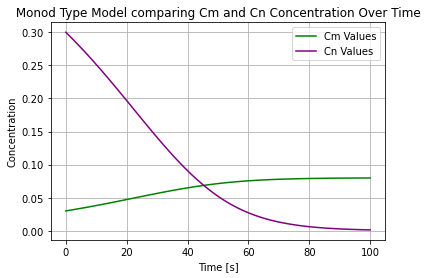

In [5]:
#plot Cm and Cn concentrations
plt.plot(time, Cm_vals,color="green")
plt.plot(time, Cn_vals, color='purple')
plt.xlabel('Time [s]')
plt.ylabel('Concentration')
plt.title(" Monod Type Model comparing Cm and Cn Concentration Over Time ")
plt.grid()
plt.legend(["Cm Values", "Cn Values"])


<font size=6 color="#009600">&#9998;</font> From the graph, the concentration of nutrients began at a very high concentration of 0.3. This makes sense becuase our intial value we set was at 0.3. As time increased, the concentration of Cn dramtically decreased and flattens out. This makes sense when we look at our ODE as there is a negative sign which infers decreasing function. 

On the other hand, the concentration of bacteria began at a relatively low amount which again matches with our intial bacteria concentration of 0.03. As time passed, this concentration of Cm gradually increased and finally flattens out. Again, our ODE represents this increase in the equation. These two curves intersect at around 45 seconds and an approximate concetration of 0.7.

Overall, this graph tells a story that lines up perfectly with our ODE's and intial conditions stated in the introduction. It is the results we would expect.


**Question 4**: Create a function `computeApproxMonodModel` that computes an approximation of $C_M$ and $C_N$ using the function `solve_ivp` of SciPy. The **inputs** are:

1. an array containing the parameters of the model
2. an array containing the initial conditions
3. the time grid

The **outputs** are: 

1. an array that contains the approximation of $C_M$ 
2. an array that contains the approximation of $C_N$

In [8]:
# Define the parameters
ks = 0.3
u1 = 0.05
u2 = 0.3


#create the inputs as arrays
params=np.array([0.3,0.05,0.3])
time = np.linspace(0, 100, 100)
init = [Cm_0, Cn_0]


#define the ApproxMonoModel function witht he inputs created above and calling olve_ivp
def computeApproxMonodModel(params, init, time):
    sol=solve_ivp(derivs, (0,100) ,init, t_eval = time, args=(params)) 
    Cm_vals = sol.y[0, :]
    Cn_vals = sol.y[1,:]
    return Cm_vals, Cn_vals

#test the function is working properly
Cm, Cn=computeApproxMonodModel(params, init, time)


**Question 5**: Using your function `computeApproxMonodModel`, assess the impact of each parameter on the approximation of $C_M$ and $C_N$. To do so, you want to answer these questions:

1. What will happen if $K_s$ increases/decreases but $\mu_1$ and $\mu_2$ are fixed? 
2. What will happen if $\mu_1$ increases/decreases  but $K_s$ and $\mu_2$ are fixed?
3. What will happen if $\mu_2$ increases/decreases  but $K_s$ and $\mu_1$ are fixed?
4. Do your answers make sense?

To answer these questions, you should vary each parameter, that is $K_s$, $\mu_1$ and $\mu_2$, one at a time. In other words, you should choose three reasonable values for each parameter and observe the impact of this change on the approximation of $C_M$ and $C_N$. Provide numerical evidences of your claims.

**Hint**: Figures with multiple subplots could be useful.

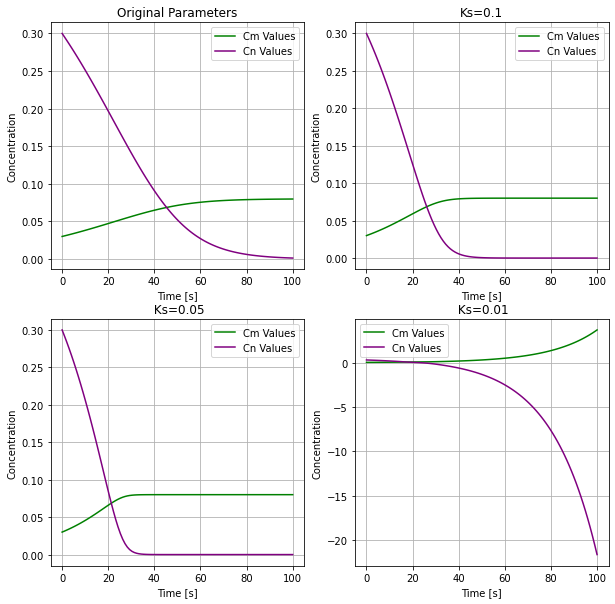

In [9]:

#decrease ks


#original parameters
params=np.array([0.3,0.05,0.3])
Cm1, Cn1=computeApproxMonodModel(params, init, time)

#decreased ks to 0.1
params1=np.array([0.1,0.05,0.3])
Cm2, Cn2=computeApproxMonodModel(params1, init, time)

#decreased ks to 0.05
params2=np.array([0.05,0.05,0.3])
Cm3, Cn3=computeApproxMonodModel(params2, init, time)

#decreased k1 to 0.01
params3=np.array([0.01,0.05,0.3])
Cm4, Cn4=computeApproxMonodModel(params3, init, time)

#plotting the variations of ks
plt.subplots(2,2,figsize=(10,10)) 

plt.subplot(2,2,1)
plt.plot(time, Cm1, color="green")
plt.plot(time, Cn1, color="purple")
plt.xlabel('Time [s]')
plt.ylabel('Concentration')
plt.title("Original Parameters")
plt.grid()
plt.legend(["Cm Values", "Cn Values"])

plt.subplot(2,2,2)
plt.plot(time, Cm2, color="green")
plt.plot(time, Cn2, color="purple")
plt.xlabel('Time [s]')
plt.ylabel('Concentration')
plt.title("Ks=0.1")
plt.grid()
plt.legend(["Cm Values", "Cn Values"])

plt.subplot(2,2,3)
plt.plot(time, Cm3, color="green")
plt.plot(time, Cn3, color="purple")
plt.xlabel('Time [s]')
plt.ylabel('Concentration')
plt.title(" Ks=0.05")
plt.grid()
plt.legend(["Cm Values", "Cn Values"])

plt.subplot(2,2,4)
plt.plot(time, Cm4, color="green")
plt.plot(time, Cn4, color="purple")
plt.xlabel('Time [s]')
plt.ylabel('Concentration')
plt.title(" Ks=0.01")
plt.grid()
plt.legend(["Cm Values", "Cn Values"])


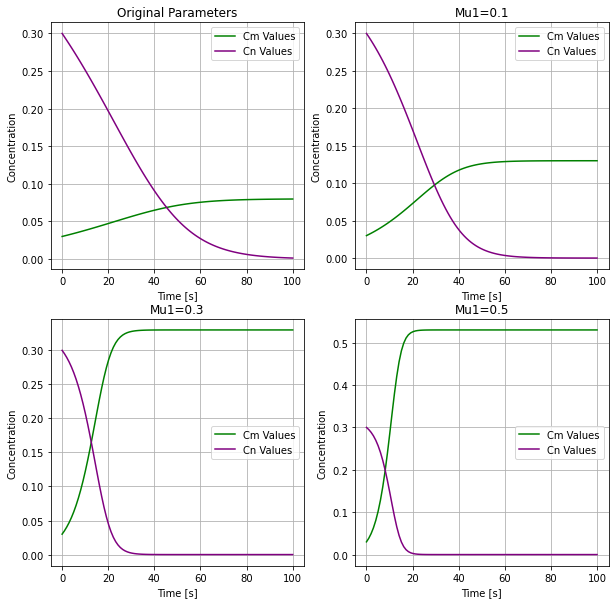

In [10]:
#increasing Mu1

#original parameters
params4=np.array([0.3,0.05,0.3])
Cm5, Cn5=computeApproxMonodModel(params4, init, time)

#increasing Mu1 to 0.1
params5=np.array([0.3,0.1,0.3])
Cm6, Cn6=computeApproxMonodModel(params5, init, time)


#increasing Mu1 to 0.3
params6=np.array([0.3,0.3,0.3])
Cm7, Cn7=computeApproxMonodModel(params6, init, time)


#increasing Mu1 to 0.5
params7=np.array([0.3,0.5,0.3])
Cm8, Cn8=computeApproxMonodModel(params7, init, time)

#plotting variations of Mu1
plt.subplots(2,2,figsize=(10,10)) 

plt.subplot(2,2,1)
plt.plot(time, Cm5, color="green")
plt.plot(time, Cn5, color="purple")
plt.xlabel('Time [s]')
plt.ylabel('Concentration')
plt.title("Original Parameters")
plt.grid()
plt.legend(["Cm Values", "Cn Values"])

plt.subplot(2,2,2)
plt.plot(time, Cm6, color="green")
plt.plot(time, Cn6, color="purple")
plt.xlabel('Time [s]')
plt.ylabel('Concentration')
plt.title("Mu1=0.1")
plt.grid()
plt.legend(["Cm Values", "Cn Values"])

plt.subplot(2,2,3)
plt.plot(time, Cm7, color="green")
plt.plot(time, Cn7, color="purple")
plt.xlabel('Time [s]')
plt.ylabel('Concentration')
plt.title("Mu1=0.3")
plt.grid()
plt.legend(["Cm Values", "Cn Values"])

plt.subplot(2,2,4)
plt.plot(time, Cm8, color="green")
plt.plot(time, Cn8, color="purple")
plt.xlabel('Time [s]')
plt.ylabel('Concentration')
plt.title("Mu1=0.5")
plt.grid()
plt.legend(["Cm Values", "Cn Values"])


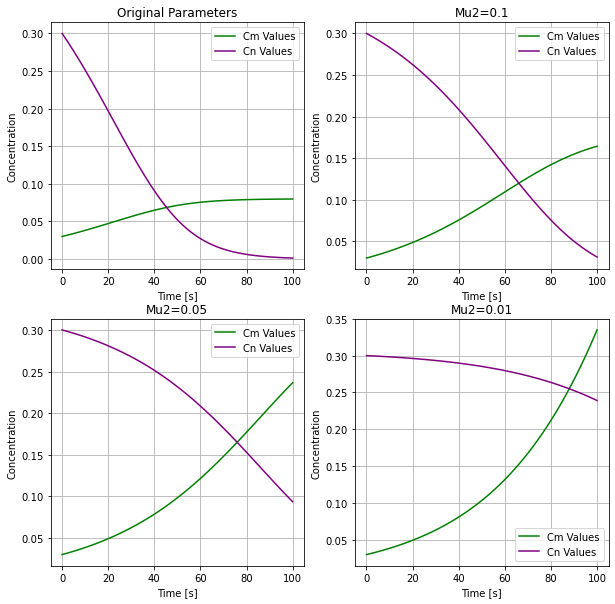

In [12]:
#decrease Mu2

#original parameters
params8=np.array([0.3,0.05,0.3])
Cm9, Cn9=computeApproxMonodModel(params8, init, time)

#decreased Mu2 to 0.1
params9=np.array([0.3,0.05,0.1])
Cm10, Cn10=computeApproxMonodModel(params9, init, time)


#decreased Mu2 to 0.05
params10=np.array([0.3,0.05,0.05])
Cm11, Cn11=computeApproxMonodModel(params10, init, time)

#decreased Mu2 to 0.01
params11=np.array([0.3,0.05,0.01])
Cm12, Cn12=computeApproxMonodModel(params11, init, time)

#plotting variations of M2
plt.subplots(2,2,figsize=(10,10)) 

plt.subplot(2,2,1)
plt.plot(time, Cm9, color="green")
plt.plot(time, Cn9, color="purple")
plt.xlabel('Time [s]')
plt.ylabel('Concentration')
plt.title("Original Parameters")
plt.grid()
plt.legend(["Cm Values", "Cn Values"])

plt.subplot(2,2,2)
plt.plot(time, Cm10, color="green")
plt.plot(time, Cn10, color="purple")
plt.xlabel('Time [s]')
plt.ylabel('Concentration')
plt.title("Mu2=0.1")
plt.grid()
plt.legend(["Cm Values", "Cn Values"])

plt.subplot(2,2,3)
plt.plot(time, Cm11, color="green")
plt.plot(time, Cn11, color="purple")
plt.xlabel('Time [s]')
plt.ylabel('Concentration')
plt.title("Mu2=0.05")
plt.grid()
plt.legend(["Cm Values", "Cn Values"])

plt.subplot(2,2,4)
plt.plot(time, Cm12, color="green")
plt.plot(time, Cn12, color="purple")
plt.xlabel('Time [s]')
plt.ylabel('Concentration')
plt.title("Mu2=0.01")
plt.grid()
plt.legend(["Cm Values", "Cn Values"])

<font size=6 color="#009600">&#9998;</font> 
__1. What will happen if  𝐾𝑠  decreases but  𝜇1  and  𝜇2  are fixed?__

Looking at the first set of subplots, as Ks becomes smaller, the quicker the concetration of nutrients (Cn) will decrease overtime. It is also apparent that there is a slightly more dramtic increase in bacteria concentration for the first few seconds before the curve begins to flatten out. Another observation is when Ks is set at 0.01, the concetrations of both the bacteria and nutrients begin close to 0. Hence, becuase Ks is close to zero, these concetrations will be close to zero as well.

__2.What will happen if  𝜇1  increases but  𝐾𝑠  and  𝜇2  are fixed?__

Looking at the next set of subplots, u1 is set to different values that are incrementally increasing. There similarities in trends observed with the subplots increasing u1 and the subplots decreasing ks. As u1 increases, the concetration of nutrients dramatically decreases (as seen in Ks). However, we observe a much more dramtic increase in the concetraion of bacteria within a small timeframe then with the plots representing a decrease in Ks. As time interval continues to increase, the curves for Cm and Cn continue to move farther and farther apart. 

__3.What will happen if  𝜇2  decreases but  𝐾𝑠  and  𝜇1  are fixed?__
The final set of subplots show the results of u2 set at 4 different values all decreasing in size. Observing these plots, it is evident that a smaller u2 results in a slower and more gradual curve representing the decrease of nutrients overtime. Furthermore, we also observe a more gradual increase in bacteria, with a more dramtaic increase towards the end of the time interval rather then the beginning which is different than what has been observed in the previosu two situations. 

__4.Do your answers make sense?__

Overall I would say all of the trends observed in the graphs make sense. They follow the ODE's stated in the introduction and accurately represent how the concentrations of Cm and Cn would react in the changing of the parameters. The relationships between the parameters Ks, U1, and U2 with Cm and Cn are reflected in both the ODE's and the plots with values that make sense in either case. 

## Part 3: First attempt to model the impact of AgNPs (13 points)

Now that you better understand the model to predict the bacterial growth, you want to consider the impact of the concentration of silver nanoparticles (AgNPs) - an antimicrobial agent, on the bacterial concentration. As a first attempt, you assume the decay rate, $k_A$, associated with the concentration of AgNPs is **known**. In this part, you will consider that the initial concentration of bacteria and nutrients at $t=0$ are respectively $0.03$ and $0.3$, and the following parameters: $K_s = 0.3$, $\mu_1 = 0.05$ and $\mu_2 = 0.3$.

**Question 6**: Modify the presented Monod model in order to consider the impact of AgNPs.

**Hint**: You should use a compartmental representation of the basic Monod model to help you and modify it considering that the AgNP is killing off/decreasing the concentration of bacteria ($C_M$). In this context, $k_A$ is the rate at which the bacteria concentration is decreasing.

**Hint**: You could use Latex to write equations in a Markdown cell. The Monod type model below is provided to give you a nice example of how you could write your model.

\begin{equation*}
    \begin{aligned}
        \frac{d C_M}{dt} =&\,\, \frac{\mu_1\,C_N}{K_s+C_N}\,C_M \\
        \frac{d C_N}{dt} =&\,\, -\frac{\mu_2\,C_N}{K_s+C_N}\,C_M
    \end{aligned}
\end{equation*}

It is **not required** that you use this format but it is strongly suggested.  

<font size=6 color="#009600">&#9998;</font> *Put your model here*

\begin{equation*}
    \begin{aligned}
        \frac{d C_M}{dt} =&\,\, \frac{\mu_1\,C_N}{K_s+C_N}\,C_M -K_a\,C_M\\ 
        \frac{d C_N}{dt} =&\,\, -\frac{\mu_2\,C_N}{K_s+C_N}\,C_M
    \end{aligned}
\end{equation*}

**Question 7**: Using `solve_ivp`, assess the impact of the decay rate associated to the concentration of AgNPs on the concentration of bacteria. To do so, you want to answer these questions:

1. What will happen if $k_A$ is 0?
2. What will happen if $k_A$ increases/decreases but $K_s$, $\mu_1$ and $\mu_2$ are fixed? 
3. Do your answers make sense?

In other words, you should choose three reasonable values for $k_A$ that you added in the model and observe the impact of this change on the approximation of $C_M$ and $C_N$. Provide numerical evidences of your claims.

In [ ]:
#restate initial conditions
ks = 0.3
u1 = 0.05
u2 = 0.3


#create a new derivs function that includes ka
def derivs_w_ka(time, curr_vals, ks, u1, u2, ka):
    
    # Unpack the current values of the variables 
    Cm = curr_vals[0]
    Cn = curr_vals[1]
    
    # Compute the derivative
    dCmdt = ((u1*Cn)/(ks+Cn))*Cm-(ka*Cm)
    dCndt = (-(u2*Cn)/(ks+Cn))*Cm
    
    return dCmdt, dCndt


#create new arrays with ka
params_ka=np.array([0.3,0.05,0.3,0])
time = np.linspace(0, 100, 100)
init = [Cm_0, Cn_0]

#define a new approximation model that includes ka
def computeApproxMonodModel2(params_ka, init, time):
    sol_ka=solve_ivp(derivs_w_ka, (0,100) ,init, t_eval = time, args=(params_ka)) 
    Cm_vals_ka = sol_ka.y[0, :]
    Cn_vals_ka = sol_ka.y[1,:]
    return Cm_vals_ka, Cn_vals_ka





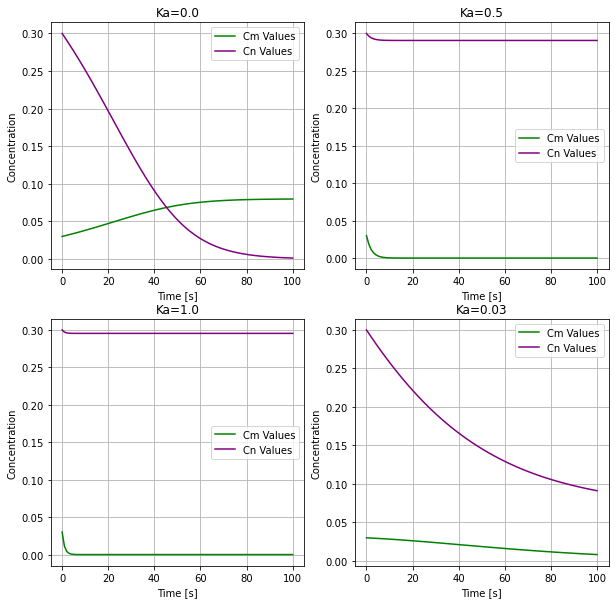

In [182]:
#setting ka=0
params_ka1=np.array([0.3,0.05,0.3, 0])
Cm_ka1, Cn_ka1=computeApproxMonodModel2(params_ka1, init, time)

#setting ka=0.5
params_ka2=np.array([0.3,0.05,0.3,0.5])
Cm_ka2, Cn_ka2=computeApproxMonodModel2(params_ka2, init, time)

#setting ka=1.0
params_ka3=np.array([0.3,0.05,0.3, 1.0])
Cm_ka3, Cn_ka3=computeApproxMonodModel2(params_ka3, init, time)

#setting ka=0.03
params_ka4=np.array([0.3,0.05,0.3, 0.03])
Cm_ka4, Cn_ka4=computeApproxMonodModel2(params_ka4, init, time)

#plotting the variations of ka
plt.subplots(2,2,figsize=(10,10)) 

plt.subplot(2,2,1)
plt.plot(time, Cm_ka1, color="green")
plt.plot(time, Cn_ka1, color="purple")
plt.xlabel('Time [s]')
plt.ylabel('Concentration')
plt.title("Ka=0.0")
plt.grid()
plt.legend(["Cm Values", "Cn Values"])

plt.subplot(2,2,2)
plt.plot(time, Cm_ka2, color="green")
plt.plot(time, Cn_ka2, color="purple")
plt.xlabel('Time [s]')
plt.ylabel('Concentration')
plt.title("Ka=0.5")
plt.grid()
plt.legend(["Cm Values", "Cn Values"])

plt.subplot(2,2,3)
plt.plot(time, Cm_ka3, color="green")
plt.plot(time, Cn_ka3, color="purple")
plt.xlabel('Time [s]')
plt.ylabel('Concentration')
plt.title("Ka=1.0")
plt.grid()
plt.legend(["Cm Values", "Cn Values"])

plt.subplot(2,2,4)
plt.plot(time, Cm_ka4, color="green")
plt.plot(time, Cn_ka4, color="purple")
plt.xlabel('Time [s]')
plt.ylabel('Concentration')
plt.title("Ka=0.03")
plt.grid()
plt.legend(["Cm Values", "Cn Values"])

<font size=6 color="#009600">&#9998;</font> __1.What will happen if  𝑘𝐴  is 0?__
If ka is set to 0, then the plot generated will be the exact same as if no ka was part of the situation. This makes sense because ka is only included in the first ODE and it is subtracted from what was already in the derivative equation from Part 1. Therefore, if ka is set to zero, then this part of the ODE will simply go away, leaving us with the orginal derivative equation that will result in the same plot as part 1.

__2. What will happen if  𝑘𝐴  increases/decreases but  𝐾𝑠 ,  𝜇1  and  𝜇2  are fixed?__

In the subplots above, I have created three  different situations where Ka is set to 0.05, 1.0, and 0.03. After observing the trends, it can be concluded that the smaller the Ka value is set to, there will be a more dramatic decrease in Cm bacteria over a very short interval of time. Furthermore, the concentration of nutrients will only slightly decline for a short period of time and then flatten out for the rest of the time interval. On the other hand, if the Ka value is smaller, then the two curves will be closer together, and the concentration of bacteria will have a much more gradual decrease. These trends match with the model represented above. The Ka causes a negative effect on the bacteria so a higher value will result in a more drmatic decrease on the bacteria. A smaller value will mean that it will take more time for the effect on the bacteria to take place. This model and the graphs represent this relationship well and the results overall make sense. 



---

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework #5, and upload it there.